<h1>Задание 1<h1>

Написать программу (Python, С# или любой другой язык программирования) для построения частотного словаря текста на русском языке без учета стоп-слов. Входной текст хранится в текстовом файле, построенный словарь также должен быть сохранен в текстовый файл в формате (словоформа, количество_вхождений_словоформы) с сортировкой по количеству вхождений. Для деления текста на токены и удаления стоп-слов использовать библиотеку nltk, а для нормализации использовать библиотеку Pymorphy2. (2 балл)

<h2>Импорт библиотек<h2>

In [325]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
#from pymystem3 import Mystem
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

#Create and stopwords list
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', 'к', 'на', 'какой-то', 'который'])

#mystem = Mystem() 

In [326]:
punctuation = punctuation + '...' + '—' + '«' + '»' + '„' + '“' + '№'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~...—«»„“№'

<h2>Определение функций<h2>

In [346]:
def get_text(file_name):
    txt = ''
    with open(file_name) as f:
        for line in f:
            line = line.rstrip("\r\n")
            line = line.rstrip(".—")
            txt += line + ' '
    return(txt)

In [347]:
def get_sentences(text):
    split_regex = re.compile(r'[.|!|?|…]')
    sentences = filter(lambda t: t, [t.strip() for t in split_regex.split(text)])
    corpus = []
    for s in sentences:
        corpus.append(s)
    return(corpus)

In [348]:
#Preprocess function
def preprocess_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [ morph.parse(word.lower())[0].normal_form for word in tokens if (word != " ") and (word not in punctuation)]
    filtered_tokens = []
    for word in lemmatized_tokens:
        if (word not in russian_stopwords) and (word != " ") and (word not in punctuation):
            filtered_tokens.append(word)
    
    
    return filtered_tokens

<h2>Начало работы</h2>

In [349]:
txt = get_text('text.txt')
txt = get_sentences(txt)
txt = ' '.join(txt)

In [350]:
txt = preprocess_text(txt)

In [351]:
from nltk import FreqDist

In [352]:
frequency_distribution = FreqDist(txt)
print(frequency_distribution)

<FreqDist with 3530 samples and 8359 outcomes>


In [353]:
frequency_distribution

FreqDist({'вера': 95, 'сказать': 73, 'всё': 61, 'знать': 58, 'свой': 55, 'весь': 47, 'николаевич': 44, 'рука': 43, 'любовь': 43, 'говорить': 43, ...})

In [354]:
for key in frequency_distribution:
    print(key, frequency_distribution[key])

вера 95
сказать 73
всё 61
знать 58
свой 55
весь 47
николаевич 44
рука 43
любовь 43
говорить 43
мочь 39
очень 39
глаз 37
видеть 36
ещё 35
анна 35
большой 34
князь 34
человек 32
ваш 32
николай 30
письмо 30
наш 29
время 28
слово 28
жизнь 25
сестра 25
точно 24
княгиня 24
спросить 24
василий 24
львович 24
день 22
любить 22
хотеть 22
смерть 22
желтковый 22
муж 21
лицо 21
твой 21
дедушка 21
аносов 21
дом 20
самый 20
женщина 19
шеин 18
первый 18
год 18
каждый 18
прекрасный 17
хороший 17
сделать 17
браслет 17
дело 16
милый 16
делать 16
ребёнок 16
голова 16
генерал 16
должный 15
душа 15
казаться 14
больший 14
город 14
пойти 14
бог 14
верочка 14
море 13
место 13
сидеть 13
стол 13
маленький 13
нога 13
оба 13
думать 13
стать 13
увидеть 13
несколько 12
глядеть 12
просить 12
понимать 12
прийти 12
господин 12
целый 11
идти 11
дверь 11
держать 11
минута 11
друг 11
свет 11
писать 11
просто 11
бояться 11
показать 11
последний 11
смешной 11
остаться 11
конец 10
также 10
чувство 10
ходить 10
красота 10
хот

лжесвидетель 2
требовать 2
определённый 2
известный 2
вопрос 2
принудить 2
почтенный 2
целомудренный 2
родительский 2
законный 2
кожа 2
жидкий 2
череп 2
зуб 2
супружество 2
неловко 2
оказаться 2
нехорошо 2
собираться 2
продолжение 2
практика 2
азарт 2
рубль 2
таинственный 2
неудовольствие 2
проходить 2
квадратный 2
вспыхнуть 2
кухня 2
ихний 2
спрашивать 2
убежать 2
догнать 2
никак 2
приходить 2
обеспокоить 2
полчаса 2
видимо 2
сложить 2
покрыть 2
посредине 2
окружать 2
движение 2
удачно 2
электрический 2
строка 2
осмеливаться 2
вкус 2
признаться 2
достойный 2
посередине 2
камень 2
точность 2
надевать 2
выбросить 2
подарить 2
умолять 2
ответ 2
мысленно 2
трогать 2
прислуга 2
слуга 2
просьба 2
род 2
положительно 2
составить 2
дух 2
васючок 2
кушетка 2
считать 2
лететь 2
фи 2
звать 2
жалоба 2
надеяться 2
вставить 2
кресло 2
вполне 2
совестно 2
гм 2
долг 2
тысяча 2
родитель 2
дитя 2
открыть 2
премия 2
блестеть 2
круглый 2
рисунок 2
понемногу 2
иллюстрация 2
булат-тугановский 2
возлюбить 2


васючка 1
фамильярный 1
декламировать 1
картина 1
спектакль 1
базар 1
знаменитый 1
смольный 1
институт 1
безобразно 1
спешников 1
местный 1
фон 1
зеккома 1
поздний 1
наёмный 1
ландо 1
штабной 1
преждевременно 1
состариться 1
жёлчный 1
измождённый 1
непосильный 1
канцелярский 1
гвардейский 1
гусарский 1
славиться 1
несравненный 1
распорядитель 1
тучный 1
старец 1
слезать 1
подножка 1
поручень 1
козёл 1
задок 1
резиновый 1
наконечник 1
грубый 1
мясистый 1
добродушно-величавый 1
презрительный 1
расположить 1
лучистый 1
припухлый 1
полукруг 1
свойственно 1
мужественный 1
вовремя 1
полушутя 1
полусерьёзно 1
поддержать 1
архиерей 1
хриповатый 1
миленький 1
крестный 1
донжуан 1
бесстыдник 1
обнажить 1
величественный 1
поочерёдно 1
браниться 1
перемежать 1
вздох 1
происходить 1
давнишний 1
одышка 1
докторишка 1
разнесчастный 1
купать 1
кисель 1
выпускать 1
увидеться 1
прыгать 1
леди 1
покойница 1
ой 1
отчаиваться 1
измениться 1
стрекоза-егоза 1
буян 1
кавалерист 1
вынуть-ка 1
кормить 1
лиманны

придвигать 1
нарезать 1
сыр 1
жмуриться 1
блаженство 1
да-с 1
покачивать 1
жаль-то 1
денёчек 1
спокойненький 1
пожить 1
кончиться 1
роза-то 1
жара 1
конфета 1
вазочка 1
карминный 1
вдеть 1
петлица 1
генеральский 1
нагнуть 1
понюхать 1
славный 1
старческий 1
разместиться 1
повеять 1
стоить 1
смазать 1
ружейный 1
замок 1
класть 1
каша 1
драть 1
целковый 1
дороговизна 1
червонец 1
довольный 1
добавить 1
горох 1
варить 1
подаваться 1
проклятый 1
кофе 1
турок 1
нейти 1
опиум 1
наесться 1
некоторый 1
лепёшка 1
затоптать 1
откровенно 1
испытывать 1
понятный 1
свист 1
пуля 1
псих 1
хвастун 1
раскисать 1
страх-то 1
возрастать 1
герой 1
храбрец 1
так-то 1
испугаться 1
расставить 1
локоть 1
уложить 1
пятка 1
ладонь 1
повествование 1
оборот 1
передавать 1
неуклюжий 1
стереотип 1
зимой 1
контузить 1
вчетвером 1
тут-то 1
страшный 1
поутру 1
встать 1
переуверить 1
приметить 1
помрачение 1
подать 1
помочить 1
рассудок 1
воротиться 1
одержать 1
смолоду 1
спокойно 1
брезговать 1
вступить 1
встретить 1
п

затем 1
пистолет 1
выстрелить 1
обратить 1
пить 1
лукерья 1
стучаться 1
взломать 1
вешать 1
матка 1
боска 1
ожерелье 1
повесить 1
икона 1
отвезти 1
упросить 1
похоронить 1
по-христианск 1
собраться 1
ладан 1
восковой 1
наискось 1
подсунуть 1
важность 1
блаженно 1
безмятежно 1
разрешить 1
человеческий 1
умиротворённый 1
маска 1
страдалец 1
пушкин 1
наполеон 1
чрезвычайно 1
интимный 1
боковой 1
шея 1
пророческий 1
раздвинуть 1
крепко 1
сжать 1
виски 1
влажный 1
дружеский 1
поцелуй 1
льстивый 1
бетховен 1
записать 1
заплакать 1
l 1
van 1
beethoven 1
son 1
largo 1
appassionato 1
домой 1
поздно 1
рада 1
застать 1
дожидаться 1
взволновать 1
кинуться 1
аккорд 1
раздвоиться 1
единовременно 1
слагаться 1
совпадать 1
куплет 1
обречь 1
боль 1
самолюбие 1
молитва 1
предвидеть 1
расстаться 1
походка 1
обвеять 1
причинить 1
молча 1
предсмертный 1
призывать 1
бить 1
скорбный 1
поить 1
усмирять 1
ствол 1
плакать 1
сотрясаться 1
налететь 1
сочувствовать 1
зашелестеть 1
подчиняться 1
навеки 1
беспокойно

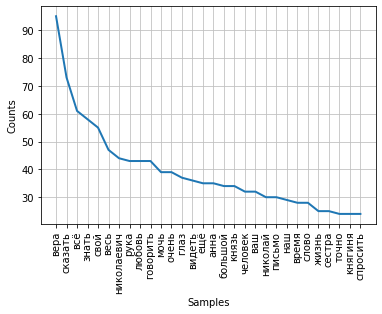

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [355]:
frequency_distribution.plot(30, cumulative=False)

In [356]:
#!pip3 install wordcloud

In [357]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [358]:
%matplotlib inline

In [359]:
text_raw = " ".join(t)

In [360]:
word_cloud = WordCloud().generate(text_raw)

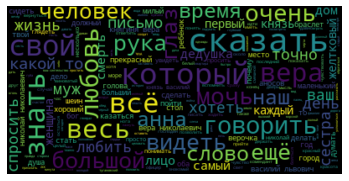

In [361]:
wordcloud = WordCloud(max_font_size=40).generate(text_raw)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2>Запись в файл</h2>

In [362]:
with open('result1.txt','w') as f:
    for key in frequency_distribution:
        f.write(key+' : '+str(frequency_distribution[key])+ '\n')
f.close()